In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Ice_cream selling data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


Text(0, 0.5, 'Sales')

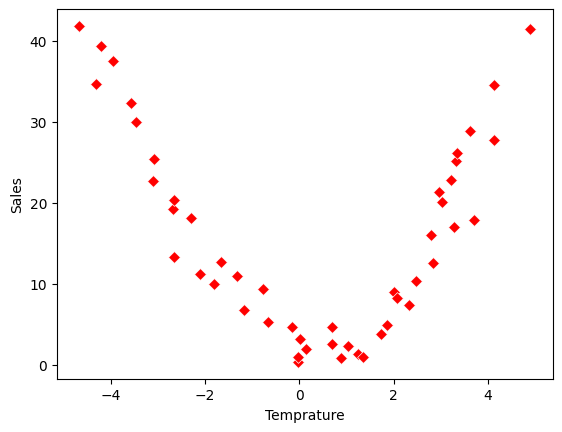

In [4]:
sns.scatterplot(x = "Temperature (°C)", y = "Ice Cream Sales (units)", data = df, color = "red", marker = "D")
plt.xlabel("Temprature")
plt.ylabel("Sales")

In [15]:
X = df[["Temperature (°C)"]]
y = df.iloc[:, 1].values


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 )




In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:
X_train_poly

array([[ 1.00000000e+00, -7.73330043e-01,  5.98039356e-01],
       [ 1.00000000e+00,  2.95993209e+00,  8.76119799e+00],
       [ 1.00000000e+00, -1.17312327e+00,  1.37621820e+00],
       [ 1.00000000e+00,  1.24071162e+00,  1.53936532e+00],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
       [ 1.00000000e+00,  3.33593241e+00,  1.11284451e+01],
       [ 1.00000000e+00,  2.78483646e+00,  7.75531413e+00],
       [ 1.00000000e+00,  2.83176021e+00,  8.01886589e+00],
       [ 1.00000000e+00,  2.31859124e+00,  5.37586534e+00],
       [ 1.00000000e+00,  4.13086796e+00,  1.70640701e+01],
       [ 1.00000000e+00,  3.70405744e+00,  1.37200415e+01],
       [ 1.00000000e+00,  2.07510060e+00,  4.30604249e+00],
       [ 1.00000000e+00,  1.74000001e+00,  3.02760004e+00],
       [ 1.00000000e+00,  2.47194600e+00,  6.11051701e+00],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00],
       [ 1.00000000e+00,  3.02087431e+00,  9.12568162e+00],
       [ 1.00000000e+00, -3.38952856e-02

In [19]:
X_test_poly

array([[ 1.00000000e+00,  1.35981267e+00,  1.84909051e+00],
       [ 1.00000000e+00, -1.49634867e-01,  2.23905933e-02],
       [ 1.00000000e+00,  3.61077848e+00,  1.30377212e+01],
       [ 1.00000000e+00, -2.28826400e+00,  5.23615213e+00],
       [ 1.00000000e+00, -3.61564977e-02,  1.30729232e-03],
       [ 1.00000000e+00,  8.74905029e-01,  7.65458810e-01],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
       [ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00],
       [ 1.00000000e+00,  6.93598873e-01,  4.81079396e-01],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00],
       [ 1.00000000e+00,  4.89903151e+00,  2.40005098e+01],
       [ 1.00000000e+00,  1.85055193e+00,  3.42454243e+00],
       [ 1.00000000e+00,  1.99931037e+00,  3.99724195e+00]])

In [20]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

y_pred = regression.predict(X_test_poly)
r2_score(y_test,y_pred)

0.9526587864825415

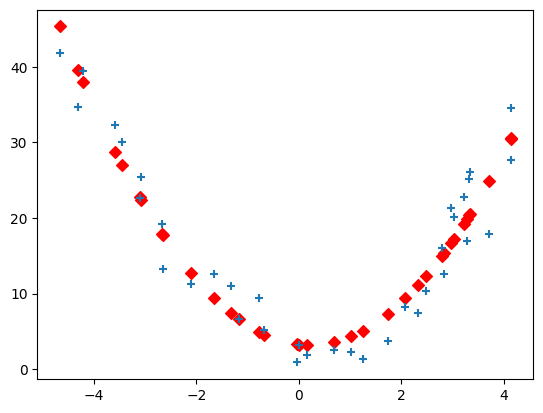

In [43]:
plt.scatter(X_train,regression.predict(poly.fit_transform(X_train)), color = "r",marker = "D")
plt.scatter(X_train, y_train, marker = "+")